In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 1.9 MB/s eta 0:00:00


In [11]:
!cd /content/drive/MyDrive/dl_bgh

In [3]:
import pandas as pd
from tabulate import tabulate
from google.colab import drive
import patoolib
import glob
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Распакуем rar

!unrar x /content/drive/MyDrive/dl_bgh/data/sources/train_dataset_rzhd_model_train.rar /content/drive/MyDrive/dl_bgh/data/sources


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/dl_bgh/data/sources/train_dataset_rzhd_model_train.rar


Would you like to replace the existing file /content/drive/MyDrive/dl_bgh/data/sources/РЖД train/Выгрузка_маркетинговые списки/МС_Владимирская область.xls
5054976 bytes, modified on 2024-10-22 16:51
with a new one
5054976 bytes, modified on 2024-10-22 16:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  /content/drive/MyDrive/dl_bgh/data/sources/РЖД train/Выгрузка_маркетинговые списки/МС_Владимирская область.xls       5%  OK 

Would you like to replace the existing file /content/drive/MyDrive/dl_bgh/data/sources/РЖД train/Выгрузка_маркетинговые списки/МС_Кировская область.xls
11808768 bytes, modified on 2024-10-22 16:51
with a new one
11808768 bytes, modified on 2024-10-22 16:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/drive/MyDrive/dl_bgh/data/sources/РЖД train/В

In [340]:
!pip install patool

from google.colab import drive
import patoolib
import pandas as pd
import glob
import zipfile
import os

drive.mount('/content/drive')

rar_path = '/content/drive/MyDrive/dl_bgh/data/sources/train_dataset_rzhd_model_train.rar'  # путь к твоему .rar файлу

output_folder = '/content/unzipped_folder'
os.makedirs(output_folder, exist_ok=True)
# patoolib.extract_archive(rar_path, outdir='/content')

# Путь к папке с файлами
file_path = '/content/РЖД train/Выгрузка_маркетинговые списки/*.xls'

# Список всех файлов
all_files = glob.glob(file_path)

# Создание списка DataFrame для каждого файла
df_list = []

for file in all_files:
    # Чтение файла
    df = pd.read_excel(file)

    # Извлечение области из имени файла
    region = file.split('_')[-1].split('.')[0]  # Например, "Владимирская область"

    # Добавление столбца с регионом
    df['Регион'] = region

    # Добавление в список
    df_list.append(df)

# Объединение всех DataFrame в один
df_mc = pd.concat(df_list, ignore_index=True)

df_raw = pd.read_excel('/content/РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Объёмы перевозок.xls', skiprows=1)

list_vol = list()
list_price = list()
unnamed_list = ['Unnamed: 0',  'Unnamed: 1',  'Unnamed: 2',   'Unnamed: 3', 'Месяц']
for col in df_raw.columns:
  if col not in unnamed_list:
    if '.1' in col:
      list_vol.append(col)
    else:
      list_price.append(col)

df_vol = df_raw[unnamed_list + list_vol]
df_price = df_raw[unnamed_list + list_price]

df_vol.rename(columns={'Unnamed: 0': 'ID',
                       'Unnamed: 1': 'Субъект федерации отп',
                       'Unnamed: 2': 'Субъект федерации наз',
                       'Unnamed: 3': 'Код груза',
                       'Месяц': 'Гр груза по опер.номен'}, inplace=True)
df_price.rename(columns={'Unnamed: 0': 'ID',
                       'Unnamed: 1': 'Субъект федерации отп',
                       'Unnamed: 2': 'Субъект федерации наз',
                       'Unnamed: 3': 'Код груза',
                       'Месяц': 'Гр груза по опер.номен' }, inplace=True)

df_vol = df_vol.iloc[1:]
df_price = df_price.iloc[1:]
df_vol.columns = df_vol.columns.str.replace('.1$', '', regex=True)


df_req = pd.read_excel('/content/РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Обращения.xls')

df_interest = pd.read_excel('/content/РЖД train/Выгрузки_интересы+обращения+объёмы перевозок/Интересы.xls')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-340-c0758f217f43>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-340-c0758f217f43>:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
date_columns = [col for col in df_price.columns if '/' in col]
date_columns = pd.to_datetime(date_columns, format='%Y/%m')
sorted_date_columns = sorted(date_columns)

# Обновление DataFrame с новыми отсортированными столбцами
sorted_columns = df_price.columns.tolist()
sorted_columns = [col for col in sorted_columns if col not in date_columns]
sorted_columns += [d.strftime('%Y/%m') for d in sorted_date_columns]

# Обновляем DataFrame
df_price = df_price.reindex(columns=sorted_columns)


date_columns = [col for col in df_vol.columns if '/' in col]
date_columns = pd.to_datetime(date_columns, format='%Y/%m')
sorted_date_columns = sorted(date_columns)

# Обновление DataFrame с новыми отсортированными столбцами
sorted_columns = df_vol.columns.tolist()
sorted_columns = [col for col in sorted_columns if col not in date_columns]
sorted_columns += [d.strftime('%Y/%m') for d in sorted_date_columns]

# Обновляем DataFrame
df_vol = df_vol.reindex(columns=sorted_columns)


In [334]:
df_price['Субъект федерации отп'].unique()

array(['Рязанская область', 'Кировская область',
       'Республика Татарстан (Татарстан)', 'Владимирская область',
       'Чувашская Республика-Чаваш Республики', 'Нижегородская область',
       'Удмуртская Республика', 'Республика Марий Эл', 'Пермский край',
       'Республика Башкортостан', 'Республика Мордовия',
       'Свердловская область'], dtype=object)

In [346]:
for a in [df_vol, df_price, df_req, df_interest]:
  display(a)

,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,2022/08,2023/10,2024/01,2022/11,2022/10,...,2023/05,2023/06,2023/09,2023/11,2022/07,2023/08,2023/03,2024/08,2022/01,2023/07
1,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ,0,0,36,0,0,...,18,18,18,0,0,0,0,0,0,0
2,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,137,0,0,0,0,0,0
3,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,203,0,0,0,0,...,0,0,0,0,336,0,0,1155,476,0
4,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,69,0,0,...,539,606,0,0,0,188,134,0,0,274
5,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,66,...,66,66,0,136,2554,62,343,65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,11274,Республика Татарстан (Татарстан),Ростовская область,24116,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,136,0,0
13422,20123,Удмуртская Республика,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,397,0,0
13423,20123,Удмуртская Республика,Алтайский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,135,0,0
13424,20123,Удмуртская Республика,Челябинская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,600,0,0


,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,2022/08,2023/10,2024/01,2022/11,2022/10,...,2023/05,2023/06,2023/09,2023/11,2022/07,2023/08,2023/03,2024/08,2022/01,2023/07
1,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ,0,0,140356,0,0,...,63072,63072,63072,0,0,0,0,0,0,0
2,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,279102,0,0,0,0,0,0
3,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,675705,0,0,0,0,...,0,0,0,0,1126175,0,0,4668608,1440050,0
4,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,62576,0,0,...,450394,506626,0,0,0,169376,113008,0,0,224378
5,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,141002,...,136458,155240,0,291698,5358606,155240,776200,151120,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,11274,Республика Татарстан (Татарстан),Ростовская область,24116,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,81935,0,0
13422,20123,Удмуртская Республика,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,871122,0,0
13423,20123,Удмуртская Республика,Алтайский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,461477,0,0
13424,20123,Удмуртская Республика,Челябинская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,1342809,0,0


,Дата,Тема,ID,Тип обращения,Номер,Тема вопроса,Группа вопросов,Количество доработок
0,2022-02-01 15:52:00,Заключение договоров: Другое,21082,Обращение,0000-009659,Заключение договоров,Другое,NaN
1,2024-02-01 10:04:00,Оформление документов связанных с перевозкой г...,1923,Обращение,0001-025297,Оформление документов связанных с перевозкой г...,Заявка ГУ-12,NaN
2,2024-02-01 11:25:00,Справочный запрос: Другое,11332,Обращение,0001-025498,Справочный запрос,Другое,NaN
3,2024-02-01 11:28:00,Справочный запрос: Другое,21155,Обращение,0001-025503,Справочный запрос,Другое,NaN
4,2024-02-01 11:30:00,Справочный запрос: Регистрация официальных обр...,21283,Обращение,0001-025506,Справочный запрос,Регистрация официальных обращений,NaN
...,...,...,...,...,...,...,...,...
2821,2023-10-31 15:52:00,Цифровые сервисы: Личный кабинет клиента,21157,Обращение,0001-295507,Цифровые сервисы,Личный кабинет клиента,NaN
2822,2023-10-31 17:13:00,Справочный запрос: Регистрация официальных обр...,16015,Обращение,0001-295628,Справочный запрос,Регистрация официальных обращений,NaN
2823,2023-10-31 17:39:00,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295645,Справочный запрос,Регистрация официальных обращений,NaN
2824,2023-10-31 17:40:00,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295647,Справочный запрос,Регистрация официальных обращений,NaN


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
0,01.02.2023 07:26,Привлечение потенциального клиента.,1.Продажа ЦФТО,Завершен неудачно,17369,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022043,"Интерес ""Привлечение потенциального клиента."" ..."
1,01.02.2023 07:31,Привлечение клиента,1.Продажа ЦФТО,Завершен неудачно,13714,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022053,"Интерес ""Привлечение клиента"" от 01.02.2023"
2,01.02.2023 07:45,Привлечение потенциального клиента ст. Подосин...,1.Продажа ЦФТО,Завершен неудачно,14984,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022069,"Интерес ""Привлечение потенциального клиента ст..."
3,01.02.2023 08:22,"Перевозка с Владимира - МСК, Ярославль",1.Продажа ЦФТО,Завершен неудачно,14916,ЦПУ ВЛАДИМИР,NaN,NaN,NaN,NaN,Обращение,0001-022106,"Интерес ""Перевозка с Владимира - МСК, Ярославл..."
4,01.02.2023 08:37,Привлечение потенциальных клиентов,1.Продажа ЦФТО,Завершен неудачно,14257,ЦПУ ШАХУНЬЯ,NaN,NaN,13.03.2023 14:30:00,звонок,10. Холодный звонок,0001-022115,"Интерес ""Привлечение потенциальных клиентов"" о..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19176,31.10.2023 17:02,Привлечение потенциального клиента,1.Продажа ЦФТО,Завершен неудачно,2780,ЦПУ КИРОВ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295610,"Интерес ""Привлечение потенциального клиента"" о..."
19177,31.10.2023 17:03,пересмотр логистики предприятия,1.Продажа ЦФТО,Завершен неудачно,13358,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295612,"Интерес ""пересмотр логистики предприятия"" от 3..."
19178,31.10.2023 17:08,пересмотр логистики предприятия,1.Продажа ЦФТО,Завершен неудачно,13359,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295618,"Интерес ""пересмотр логистики предприятия"" от 3..."
19179,31.10.2023 17:11,организация ж.д.перевозки,1.Продажа ЦФТО,Завершен неудачно,13360,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295625,"Интерес ""организация ж.д.перевозки"" от 31.10.2023"


In [70]:
# df requrements (Обращения / Запросы)
print("----------head----------")
display(df_req.head(5))
print("----------tail----------")
display(df_req.tail(5))

----------head----------


,Дата,Тема,ID,Тип обращения,Номер,Тема вопроса,Группа вопросов,Количество доработок
0,2022-02-01 15:52:00,Заключение договоров: Другое,21082,Обращение,0000-009659,Заключение договоров,Другое,NaN
1,2024-02-01 10:04:00,Оформление документов связанных с перевозкой г...,1923,Обращение,0001-025297,Оформление документов связанных с перевозкой г...,Заявка ГУ-12,NaN
2,2024-02-01 11:25:00,Справочный запрос: Другое,11332,Обращение,0001-025498,Справочный запрос,Другое,NaN
3,2024-02-01 11:28:00,Справочный запрос: Другое,21155,Обращение,0001-025503,Справочный запрос,Другое,NaN
4,2024-02-01 11:30:00,Справочный запрос: Регистрация официальных обр...,21283,Обращение,0001-025506,Справочный запрос,Регистрация официальных обращений,NaN


----------tail----------


,Дата,Тема,ID,Тип обращения,Номер,Тема вопроса,Группа вопросов,Количество доработок
2821,2023-10-31 15:52:00,Цифровые сервисы: Личный кабинет клиента,21157,Обращение,0001-295507,Цифровые сервисы,Личный кабинет клиента,NaN
2822,2023-10-31 17:13:00,Справочный запрос: Регистрация официальных обр...,16015,Обращение,0001-295628,Справочный запрос,Регистрация официальных обращений,NaN
2823,2023-10-31 17:39:00,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295645,Справочный запрос,Регистрация официальных обращений,NaN
2824,2023-10-31 17:40:00,Справочный запрос: Регистрация официальных обр...,4065,Обращение,0001-295647,Справочный запрос,Регистрация официальных обращений,NaN
2825,2023-10-31 23:52:00,Справочный запрос: Регистрация официальных обр...,21290,Обращение,0001-295705,Справочный запрос,Регистрация официальных обращений,NaN


In [81]:
df_req['Тема вопроса'].unique()

array(['Заключение договоров',
       'Оформление документов связанных с перевозкой грузов',
       'Справочный запрос', 'Электронный обмен документами',
       'Цифровые сервисы', 'Дополнительные услуги',
       'Перевозка грузов и порожних вагонов', 'Финансовые расчеты',
       'Жалобы',
       'Перевозка грузов в рефрижераторных секциях ИВ-термосах вагонах-термосах',
       'Перевозка сборной/мелкой партии грузов / разовая',
       'Благодарности', 'Перевозка грузов в контейнерах', nan],
      dtype=object)

In [17]:
# df interests (Интересы)
print("----------head----------")
display(df_interest.head(3))
print("----------tail----------")
display(df_interest.tail(3))

----------head----------


,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
0,2023-02-01 07:26:00,Привлечение потенциального клиента.,1.Продажа ЦФТО,Завершен неудачно,17369,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022043,"Интерес ""Привлечение потенциального клиента."" ..."
1,2023-02-01 07:31:00,Привлечение клиента,1.Продажа ЦФТО,Завершен неудачно,13714,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022053,"Интерес ""Привлечение клиента"" от 01.02.2023"
2,2023-02-01 07:45:00,Привлечение потенциального клиента ст. Подосин...,1.Продажа ЦФТО,Завершен неудачно,14984,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022069,"Интерес ""Привлечение потенциального клиента ст..."


----------tail----------


,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
19178,2023-10-31 17:08:00,пересмотр логистики предприятия,1.Продажа ЦФТО,Завершен неудачно,13359,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295618,"Интерес ""пересмотр логистики предприятия"" от 3..."
19179,2023-10-31 17:11:00,организация ж.д.перевозки,1.Продажа ЦФТО,Завершен неудачно,13360,ЦПУ КАЗАНЬ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295625,"Интерес ""организация ж.д.перевозки"" от 31.10.2023"
19180,2023-10-31 18:16:00,Привлечение клиента,5. Продажа услуг аренды локомотивов,Завершен неудачно,11963,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-295668,"Интерес ""Привлечение клиента"" от 31.10.2023"


In [200]:
df_interest[['Дата', 'Тема',	'Сценарий',	'Состояние',	'ID']].groupby('ID').agg('count').sort_values('Дата').tail(20)

,Дата,Тема,Сценарий,Состояние
ID,,,,
4320,13,13,13,13
12170,13,13,13,13
12465,13,13,13,13
5258,13,13,13,13
14419,13,13,13,13
7070,13,13,13,13
115,13,13,13,13
13455,13,13,13,13
13385,14,14,14,14


In [196]:
import pandas as pd
import plotly.graph_objects as go
from pandas import Timestamp
from datetime import datetime, timedelta

def plot_client_n_day_interactions(client_id, df, n_days=60, interval_days=30):
    """
    Строит график взаимодействий клиента c поддержкой за n дней с заданным интервалом.
    """

    bad_statuses = ['Завершен неудачно', 'Отказ в работе']
    good_statuses = ['Завершен успешно', 'Привлечение на "РЖД Маркет"', 'Коммерческое предложение',
                    'Заказ оформлен', 'Готов к оказанию услуг',
                   'Подключение тарифа', 'Анализ клиента',
                   'Регистрация клиента на "РЖД Маркет"', 'Раз. предложения\\Офор.заказа на "РЖД Маркет"',
                   'Аккредитация на "РЖД Маркет"']
    neutral_statuses = ['Заключение договора', 'Проведение переговоров']


    # Фильтрация данных по ID клиента
    client_df = df[df['ID'] == client_id]

    # Преобразование столбца 'Дата' в datetime
    client_df['Дата'] = pd.to_datetime(client_df['Дата'])

    # Заданный диапазон дат
    start_range = pd.to_datetime('2022-03-15')
    end_range = pd.to_datetime('2024-09-19')
    client_df = client_df[(client_df['Дата'] >= start_range) & (client_df['Дата'] <= end_range)]



    # Генерация дат для точек на графике
    dates = []
    current_date = start_range
    while current_date <= end_range:
        dates.append(current_date)
        current_date += timedelta(days=interval_days)

    interactions_data = []
    hover_text = []
    marker_colors = []

    for date in dates:

        period_start = date - timedelta(days=n_days)
        period_end = date

        period_interactions = client_df[(client_df['Дата'] >= period_start) & (client_df['Дата'] < period_end)]

        interaction_count = len(period_interactions)
        interactions_data.append(interaction_count)

        # Подсчет хороших и плохих статусов для цвета маркера
        good_count = period_interactions[period_interactions['Состояние'].isin(good_statuses)].shape[0]
        bad_count = period_interactions[period_interactions['Состояние'].isin(bad_statuses)].shape[0]
        marker_colors.append('#87A386' if good_count >= bad_count else '#CBB299')

        # Формирование текста подсказки с информацией о теме, состоянии и сценарии
        text = f"{date.strftime('%Y-%m-%d')}: {interaction_count} взаимодействий за {n_days} дней<br>"
        for _, row in period_interactions.iterrows():
            status_color = "green" if row['Состояние'] in good_statuses else "red"
            text += f"- {row['Тема']} ({row['Сценарий']}): <span style='color:{status_color}'>{row['Состояние']}</span><br>"
        hover_text.append(text)

    interactions_df = pd.DataFrame({'Дата': dates, 'Количество': interactions_data})


    # Определение цвета линии
    line_color = []
    for i in range(1, len(interactions_df)):
        if interactions_df['Количество'].iloc[i] > interactions_df['Количество'].iloc[i - 1]:
            line_color.append('#87A386')
        else:
            line_color.append('#CBB299')


    # Создание графика
    fig = go.Figure()


    # Добавление точек на график с цветными маркерами
    fig.add_trace(go.Scatter(
        x=interactions_df['Дата'],
        y=interactions_df['Количество'],
        mode='lines+markers',
        line=dict(color='#DCD0C0'),  # Базовый цвет линии
        marker=dict(size=10, color=marker_colors, line=dict(width=2, color='#F0EAD2')),
        hovertext=hover_text,
        hoverinfo="text"
    ))


     # Добавление цветных сегментов линии
    for i in range(len(line_color)):
        fig.add_trace(go.Scatter(
            x=interactions_df['Дата'].iloc[i:i+2],
            y=interactions_df['Количество'].iloc[i:i+2],
            mode='lines',
            line=dict(color=line_color[i], width=3),
            showlegend=False
        ))


    # Настройка макета графика
    fig.update_layout(
        title=f'Взаимодействия клиента {client_id} за {n_days} дней (интервал {interval_days} дней)',
        xaxis_title='Дата',
        yaxis_title='Количество взаимодействий',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
    )

    return fig

In [343]:
fig = plot_client_n_day_interactions(client_id=912, df=df_interest, n_days=30, interval_days=30)
fig.show()

<ipython-input-196-b3aeeeb2455a>:24: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-196-b3aeeeb2455a>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

def plot_client_monthly_shipments(client_id, df, n_months=6, interval_months=1):
    """
    Строит график объема отгрузок клиента за n месяцев с заданным интервалом.
    """

    # Фильтрация данных по ID клиента
    client_df = df[df['ID'] == client_id].groupby(by="ID").agg('sum')

    # Получение списка месяцев
    months = pd.to_datetime(client_df.columns[5:], format='%Y/%m').to_series()

    # Генерация дат для точек на графике
    dates = []
    current_date = months.min()
    while current_date <= months.max():
        dates.append(current_date)
        current_date = current_date + pd.DateOffset(months=interval_months)


    shipments_data = []
    hover_text = []
    marker_colors = [] # Пока что не используется, но оставил для будущих модификаций

    for date in dates:
        period_start = date - pd.DateOffset(months=n_months)
        period_end = date

        # Выбор столбцов с данными за период
        period_columns = months[(months >= period_start) & (months < period_end)].dt.strftime('%Y/%m').tolist()

        # Суммирование отгрузок за период
        if period_columns: # Проверка на пустой список
            try:
                shipment_sum = client_df[period_columns].sum(axis=1).values[0]
            except IndexError: # Обработка случая, если данных для клиента нет
                shipment_sum = 0
        else:
            shipment_sum = 0

        shipments_data.append(shipment_sum)

        # Формирование текста подсказки
        text = f"{date.strftime('%Y-%m')}: {shipment_sum} отгрузок за {n_months} месяцев<br>"

        # Добавляем информацию о каждой отгрузке в подсказку (если нужно) -  адаптируйте под ваши данные
        for month in period_columns:
            text += f"- {month}: {client_df[month].values[0]}<br>"

        hover_text.append(text)

    shipments_df = pd.DataFrame({'Дата': dates, 'Количество': shipments_data})

    # Определение цвета линии (аналогично предыдущему коду)
    line_color = []
    for i in range(1, len(shipments_df)):
        if shipments_df['Количество'].iloc[i] > shipments_df['Количество'].iloc[i - 1]:
            line_color.append('#87A386')
        else:
            line_color.append('#CBB299')

    # Создание графика
    fig = go.Figure()

    # Добавление точек на график
    fig.add_trace(go.Scatter(
        x=shipments_df['Дата'],
        y=shipments_df['Количество'],
        mode='lines+markers',
        line=dict(color='#DCD0C0'),
        marker=dict(size=10, line=dict(width=2, color='#F0EAD2')),  # Можете добавить color=marker_colors, если нужно
        hovertext=hover_text,
        hoverinfo="text"
    ))

    # Добавление цветных сегментов линии
    for i in range(len(line_color)):
        fig.add_trace(go.Scatter(
            x=shipments_df['Дата'].iloc[i:i+2],
            y=shipments_df['Количество'].iloc[i:i+2],
            mode='lines',
            line=dict(color=line_color[i], width=3),
            showlegend=False
        ))

    # Настройка макета графика (аналогично предыдущему коду)
    fig.update_layout(
        title=f'Покупки клиента (в рублях) {client_id} (интервал {interval_months} месяцев)',
        xaxis_title='Дата',
        yaxis_title='Количество отгрузок',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
    )

    return fig

In [318]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def plot_price_statistics(df, region):
    """
    Строит график моды, медианы и среднего для заданного региона по времени.
    """

    # Фильтрация данных по региону
    df_region = df[df['Субъект федерации наз'] == region]

    # Преобразование данных: оставляем только столбцы с датами и ценами
    df_melted = df_region.melt(id_vars=['ID', 'Субъект федерации наз'],
                               var_name='Дата', value_name='Цена')

    # Преобразование столбца с датой в формат datetime
    df_melted['Дата'] = pd.to_datetime(df_melted['Дата'], format='%Y/%m', errors='coerce')

    # Убираем строки с NaN в столбце 'Дата' и строки с нулевыми значениями цены
    df_melted = df_melted.dropna(subset=['Дата'])
    df_melted = df_melted[df_melted['Цена'] > 0]

    # Группируем по дате и рассчитываем среднее, медиану и моду
    grouped = df_melted.groupby('Дата').agg(
        Среднее=('Цена', 'mean'),
        Медиана=('Цена', 'median'),
        Мода=('Цена', lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    ).reset_index()

    # Создание графика с Plotly
    fig = go.Figure()

    # Линия для среднего
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Среднее'],
        mode='lines+markers',
        name='Среднее',
        line=dict(color='#87A386'),  # Цвет линии для среднего
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Среднее = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Среднее'])],
        hoverinfo="text"
    ))

    # Линия для медианы
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Медиана'],
        mode='lines+markers',
        name='Медиана',
        line=dict(color='#CBB299'),  # Цвет линии для медианы
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Медиана = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Медиана'])],
        hoverinfo="text"
    ))

    # Линия для моды
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Мода'],
        mode='lines+markers',
        name='Мода',
        line=dict(color='#DCD0C0'),  # Цвет линии для моды
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Мода = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Мода'])],
        hoverinfo="text"
    ))

    # Настройка макета графика
    fig.update_layout(
        title=f'Статистика для региона: {region}',
        xaxis_title='Дата',
        yaxis_title='Рублей',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
        hovermode='x unified'
    )

    return fig

# Пример использования:
fig = plot_price_statistics(df_price, 'Кировская область')
fig.show()

In [313]:
df_price[df_price['Субъект федерации отп'] == 'Чувашская Республика-Чаваш Республики'].groupby('Субъект федерации отп').agg(min)

<ipython-input-313-0be340a16fd8>:1: FutureWarning:

The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



,ID,Субъект федерации наз,Код груза,Гр груза по опер.номен,2022/08,2023/10,2024/01,2022/11,2022/10,2022/05,...,2023/05,2023/06,2023/09,2023/11,2022/07,2023/08,2023/03,2024/08,2022/01,2023/07
Субъект федерации отп,,,,,,,,,,,,,,,,,,,,,
Чувашская Республика-Чаваш Республики,10587,Алтайский край,1100,АВТОМОБИЛИ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
df_price.sample(10)

,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,2022/08,2023/10,2024/01,2022/11,2022/10,...,2023/05,2023/06,2023/09,2023/11,2022/07,2023/08,2023/03,2024/08,2022/01,2023/07
1873,21583,Республика Татарстан (Татарстан),Краснодарский край,31607,ЛОМ ЧЕРНЫХ МЕТАЛЛОВ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13131,20294,Нижегородская область,Калужская область,31607,ЛОМ ЧЕРНЫХ МЕТАЛЛОВ,0,0,0,0,0,...,0,0,0,0,0,0,0,203423,0,0
10787,12887,Кировская область,Кировская область,8117,ЛЕСНЫЕ ГРУЗЫ,0,0,0,0,0,...,23557,0,0,0,0,0,0,0,0,0
2558,1843,Кировская область,Саратовская область,31605,ЛОМ ЧЕРНЫХ МЕТАЛЛОВ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7810,21504,Кировская область,Алтайский край,39149,МЕТИЗЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,339696,0,0
8670,11321,Кировская область,Республика Коми,63222,ПРОМ.ТОВАРЫ НАР.ПОТРЕБЛЕНИЯ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13257,12690,Владимирская область,Приморский край,75606,ХИМИКАТЫ И СОДА,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967,13932,Нижегородская область,Город Санкт-Петербург город федерального,1400,ЗЕРНО,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,115,Владимирская область,Волгоградская область,12203,ЛЕСНЫЕ ГРУЗЫ,0,0,238888,0,0,...,0,0,0,0,0,0,0,120110,0,0
7098,3933,Нижегородская область,Республика Адыгея (Адыгея),8103,ЛЕСНЫЕ ГРУЗЫ,0,2223472,0,0,0,...,0,0,221484,1189216,0,969060,0,0,0,0


In [376]:
plot_client_monthly_shipments(client_id=12233, df=df_price, n_months=1, interval_months=1)

In [320]:
df_vol

,ID,Субъект федерации отп,Субъект федерации наз,Код груза,Гр груза по опер.номен,2022/08,2023/10,2024/01,2022/11,2022/10,...,2023/05,2023/06,2023/09,2023/11,2022/07,2023/08,2023/03,2024/08,2022/01,2023/07
1,21220,Рязанская область,Оренбургская область,39146,МЕТИЗЫ,0,0,36,0,0,...,18,18,18,0,0,0,0,0,0,0
2,912,Кировская область,Саратовская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,137,0,0,0,0,0,0
3,912,Кировская область,Приморский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,203,0,0,0,0,...,0,0,0,0,336,0,0,1155,476,0
4,912,Кировская область,Удмуртская Республика,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,69,0,0,...,539,606,0,0,0,188,134,0,0,274
5,912,Кировская область,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,66,...,66,66,0,136,2554,62,343,65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,11274,Республика Татарстан (Татарстан),Ростовская область,24116,ПРОМ.СЫРЬЕ И ФОРМ. МАТ-ЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,136,0,0
13422,20123,Удмуртская Республика,Оренбургская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,397,0,0
13423,20123,Удмуртская Республика,Алтайский край,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,135,0,0
13424,20123,Удмуртская Республика,Челябинская область,32411,ЧЕРНЫЕ МЕТАЛЛЫ,0,0,0,0,0,...,0,0,0,0,0,0,0,600,0,0


In [323]:
import pandas as pd
import plotly.graph_objects as go

def plot_client_monthly_volumes(client_id, df, n_months=6, interval_months=1):
    """
    Строит график объема отгрузок клиента за n месяцев с заданным интервалом.
    """

    # Фильтрация данных по ID клиента
    client_df = df[df['ID'] == client_id].groupby(by="ID").agg('sum')

    # Получение списка месяцев (столбцы начиная с 5-го)
    months = pd.to_datetime(client_df.columns[5:], format='%Y/%m').to_series()

    # Генерация дат для точек на графике
    dates = []
    current_date = months.min()
    while current_date <= months.max():
        dates.append(current_date)
        current_date = current_date + pd.DateOffset(months=interval_months)

    volumes_data = []
    hover_text = []

    for date in dates:
        period_start = date - pd.DateOffset(months=n_months)
        period_end = date

        # Выбор столбцов с данными за период
        period_columns = months[(months >= period_start) & (months < period_end)].dt.strftime('%Y/%m').tolist()

        # Суммирование объемов за период
        if period_columns:  # Проверка на пустой список столбцов
            try:
                volume_sum = client_df[period_columns].sum(axis=1).values[0]
            except IndexError:  # Обработка случая, если данных для клиента нет
                volume_sum = 0
        else:
            volume_sum = 0

        volumes_data.append(volume_sum)

        # Формирование текста подсказки для всплывающих окон
        text = f"{date.strftime('%Y-%m')}: {volume_sum} объема за {n_months} месяцев<br>"

        # Добавляем информацию о каждом месяце в подсказку
        for month in period_columns:
            text += f"- {month}: {client_df[month].values[0]}<br>"

        hover_text.append(text)

    volumes_df = pd.DataFrame({'Дата': dates, 'Объем': volumes_data})

    # Создание графика
    fig = go.Figure()

    # Добавление точек на график
    fig.add_trace(go.Scatter(
        x=volumes_df['Дата'],
        y=volumes_df['Объем'],
        mode='lines+markers',
        line=dict(color='#DCD0C0'),
        marker=dict(size=10, line=dict(width=2, color='#F0EAD2')),
        hovertext=hover_text,
        hoverinfo="text"
    ))

    # Настройка макета графика
    fig.update_layout(
        title=f'Объем отгрузок клиента {client_id} (интервал {interval_months} месяцев)',
        xaxis_title='Дата',
        yaxis_title='Объем отгрузок',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
    )

    return fig

# Пример использования:
fig = plot_client_monthly_volumes(client_id=912, df=df_vol, n_months=2, interval_months=1)
fig.show()

In [324]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def plot_volume_statistics(df, region):
    """
    Строит график моды, медианы и среднего объема для заданного региона по времени.
    """

    # Фильтрация данных по региону
    df_region = df[df['Субъект федерации наз'] == region]

    # Преобразование данных: оставляем только столбцы с датами и объемами
    df_melted = df_region.melt(id_vars=['ID', 'Субъект федерации наз'],
                               var_name='Дата', value_name='Объем')

    # Преобразование столбца с датой в формат datetime
    df_melted['Дата'] = pd.to_datetime(df_melted['Дата'], format='%Y/%m', errors='coerce')

    # Убираем строки с NaN в столбце 'Дата' и строки с нулевыми значениями объема
    df_melted = df_melted.dropna(subset=['Дата'])
    df_melted = df_melted[df_melted['Объем'] > 0]

    # Группируем по дате и рассчитываем среднее, медиану и моду
    grouped = df_melted.groupby('Дата').agg(
        Среднее=('Объем', 'mean'),
        Медиана=('Объем', 'median'),
        Мода=('Объем', lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    ).reset_index()

    # Создание графика с Plotly
    fig = go.Figure()

    # Линия для среднего
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Среднее'],
        mode='lines+markers',
        name='Среднее',
        line=dict(color='#87A386'),  # Цвет линии для среднего
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Среднее = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Среднее'])],
        hoverinfo="text"
    ))

    # Линия для медианы
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Медиана'],
        mode='lines+markers',
        name='Медиана',
        line=dict(color='#CBB299'),  # Цвет линии для медианы
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Медиана = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Медиана'])],
        hoverinfo="text"
    ))

    # Линия для моды
    fig.add_trace(go.Scatter(
        x=grouped['Дата'],
        y=grouped['Мода'],
        mode='lines+markers',
        name='Мода',
        line=dict(color='#DCD0C0'),  # Цвет линии для моды
        marker=dict(size=8, line=dict(width=2, color='#F0EAD2')),
        hovertext=[f"{d:%Y-%m}: Мода = {v:.2f}" for d, v in zip(grouped['Дата'], grouped['Мода'])],
        hoverinfo="text"
    ))

    # Настройка макета графика
    fig.update_layout(
        title=f'Статистика объема для региона: {region}',
        xaxis_title='Дата',
        yaxis_title='Объем (тонны)',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
        hovermode='x unified'
    )

    return fig

# Пример использования:
fig = plot_volume_statistics(df_vol, 'Кировская область')
fig.show()

In [258]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime, timedelta

def plot_client_monthly_shipments(client_id, df, n_months, interval_months):
    """
    Строит график объема отгрузок клиента за интервал interval_months.
    """

    # Фильтрация данных по ID клиента
    client_df = df[df['ID'] == client_id].groupby('ID').agg('sum')

    # Получение списка месяцев
    months = pd.to_datetime(df.columns[5:], format='%Y/%m').to_series()

    # Генерация дат для точек на графике с шагом interval_months
    dates = []
    current_date = months.min()
    while current_date <= months.max():
        dates.append(current_date)
        current_date += pd.DateOffset(months=interval_months)

    shipments_data = []
    hover_text = []

    for date in dates:
        # Определение периода interval_months
        period_start = date
        period_end = date + pd.DateOffset(months=interval_months) - pd.DateOffset(days=1)  # включительно

        # Выбор столбцов с данными за период
        period_columns = months[(months >= period_start) & (months <= period_end)].dt.strftime('%Y/%m').tolist()

        # Суммирование отгрузок за период
        if period_columns:
            try:
                shipment_sum = client_df[period_columns].sum(axis=1).values[0]
            except IndexError:
                shipment_sum = 0
        else:
            shipment_sum = 0

        shipments_data.append(shipment_sum)

        # Формирование текста подсказки
        text = f"{date.strftime('%Y-%m')} - {period_end.strftime('%Y-%m')}: {shipment_sum}<br>"
        if not client_df.empty:  # Проверка на пустой DataFrame
            #text += f"Субъект федерации отп: {client_df['Субъект федерации отп'].iloc[0]}<br>"
            #text += f"Субъект федерации наз: {client_df['Субъект федерации наз'].iloc[0]}<br>"
            #text += f"Код груза: {client_df['Код груза'].iloc[0]}<br>"
            #text += f"Гр груза по опер.номен: {client_df['Гр груза по опер.номен'].iloc[0]}<br>"
            pass
        hover_text.append(text)

    shipments_df = pd.DataFrame({'Дата': dates, 'Количество': shipments_data})

    # Определение цвета линии
    line_color = []
    for i in range(1, len(shipments_df)):
        if shipments_df['Количество'].iloc[i] > shipments_df['Количество'].iloc[i - 1]:
            line_color.append('#87A386')
        else:
            line_color.append('#CBB299')

    # Создание графика
    fig = go.Figure()

    # Добавление цветных сегментов линии (сначала линии, чтобы маркеры были сверху)
    for i in range(len(line_color)):
        fig.add_trace(go.Scatter(
            x=shipments_df['Дата'].iloc[i:i+2],
            y=shipments_df['Количество'].iloc[i:i+2],
            mode='lines',
            line=dict(color=line_color[i], width=3),
            showlegend=False,
            hoverinfo='none' # чтобы не мешали подсказки от маркеров
        ))


    # Добавление точек на график
    fig.add_trace(go.Scatter(
        x=shipments_df['Дата'],
        y=shipments_df['Количество'],
        mode='markers',  # Только маркеры, линии уже отрисованы
        marker=dict(size=10, line=dict(width=2, color='#CBB299')),
        hovertext=hover_text,
        hoverinfo="text"
    ))



    # Настройка макета графика
    fig.update_layout(
        title=f'Покупки клиента (в рублях) {client_id} за {n_months} месяцев (интервал {interval_months} месяцев)',
        xaxis_title='Дата',
        yaxis_title='Количество отгрузок',
        plot_bgcolor='#F8F2EC',
        paper_bgcolor='#F8F2EC',
        font_family="Garamond",
        font_color="#5E503F",
        title_font_family="Garamond",
        title_font_color="#5E503F",
    )

    return fig

In [259]:
plot_client_monthly_shipments(client_id=8733, df=df_price, n_months=1, interval_months=1)

In [279]:
import pandas as pd
import plotly.graph_objects as go
from scipy import stats as st

def plot_region_monthly_stats(df, region):
    """
    Строит график изменения медианы, моды и среднего для указанного региона.
    """

    # Фильтрация данных по региону (Субъект федерации наз)
    region_df = df[df['Субъект федерации наз'] == region]

    if region_df.empty:
        return go.Figure().update_layout(title=f"Нет данных для региона: {region}")


    # Получение названий столбцов с данными (даты)
    date_columns = region_df.columns[5:]

    medians = []
    means = []
    modes = []
    dates = []

    for column in date_columns:
        try:  # Пробуем преобразовать в числовые значения
            numeric_data = pd.to_numeric(region_df[column], errors='coerce').dropna()


            if not numeric_data.empty: # Проверка на пустоту после удаления NaT
                dates.append(pd.to_datetime(column, format='%Y/%m'))
                medians.append(numeric_data.median())
                means.append(numeric_data.mean())
                # mode может быть несколько, берем первое
                modes.append(st.mode(numeric_data)[0][0])

        except (TypeError, ValueError): # Если столбец не числовой, пропускаем
            pass

    # Создание графика
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=dates, y=medians, mode='lines+markers', name='Медиана'))
    fig.add_trace(go.Scatter(x=dates, y=means, mode='lines+markers', name='Среднее'))
    fig.add_trace(go.Scatter(x=dates, y=modes, mode='lines+markers', name='Мода'))


    fig.update_layout(
        title=f'Статистика по региону: {region}',
        xaxis_title='Дата',
        yaxis_title='Значение',
    )

    return fig

In [282]:
plot_region_monthly_stats(df=df_price, region="Рязанская область")

IndexError: invalid index to scalar variable.

In [131]:
max(df_interest['Дата'])

Timestamp('2024-09-19 16:41:00')

In [125]:
df_interest['Состояние'].unique()

array(['Завершен неудачно', 'Завершен успешно',
       'Привлечение на "РЖД Маркет"', 'Коммерческое предложение',
       'Заключение договора', 'Заказ оформлен', 'Готов к оказанию услуг',
       'Отказ в работе', 'Проведение переговоров', 'Подключение тарифа',
       'Анализ клиента', 'Регистрация клиента на "РЖД Маркет"',
       'Раз. предложения\\Офор.заказа на "РЖД Маркет"',
       'Аккредитация на "РЖД Маркет"'], dtype=object)

In [40]:
print(df_interest['Ожидаемая выручка'].isna().sum() / len(df_interest))
print(df_interest['Вероятность сделки, %'].isna().sum() / len(df_interest))
print(df_interest['Дата следующей активности'].isna().sum() / len(df_interest))
print(df_interest['Следующая активность'].isna().sum() / len(df_interest))

0.8538136697773838
0.7705020593295449
0.7266565872477972
0.7266565872477972


In [71]:
df_interest['Ожидаемая выручка'].notna().sum()

2804

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/dl_bgh/function_helpers')

In [ ]:
from pretty_display import pretty_info

In [ ]:
print("df_req.info():")
pretty_info(df_req)

print("\ndf_interests.info():")
pretty_info(df_interest)


df_req.info():
+---------+--------------------+--------------------+----------------+
| #       | Column             | Non-Null Count     | Dtype          |
+=========+====================+====================+================+
| #       | Column             | Non-Null           | Dtype          |
+---------+--------------------+--------------------+----------------+
| ---     | ------             | ------             | -----          |
+---------+--------------------+--------------------+----------------+
| 0       | Дата               | 2826               | datetime64[ns] |
+---------+--------------------+--------------------+----------------+
| 1       | Тема               | 2826               | object         |
+---------+--------------------+--------------------+----------------+
| 2       | ID                 | 2826               | int64          |
+---------+--------------------+--------------------+----------------+
| 3       | Тип                | 2826               | object  

In [33]:
df_req['Дата']

,Дата
0,2022-02-01 15:52:00
1,2024-02-01 10:04:00
2,2024-02-01 11:25:00
3,2024-02-01 11:28:00
4,2024-02-01 11:30:00
...,...
2821,2023-10-31 15:52:00
2822,2023-10-31 17:13:00
2823,2023-10-31 17:39:00
2824,2023-10-31 17:40:00


In [88]:
# Преобразование строковых дат в формат datetime
df_req['Дата'] = pd.to_datetime(df_req['Дата'], format='%d.%m.%Y %H:%M')
df_interest['Дата'] = pd.to_datetime(df_interest['Дата'], format='%d.%m.%Y %H:%M')

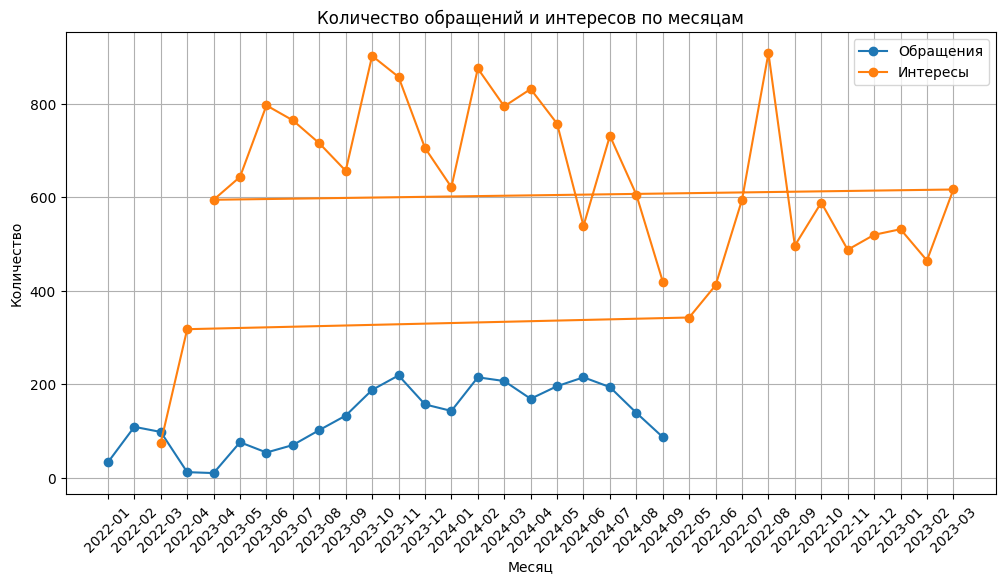

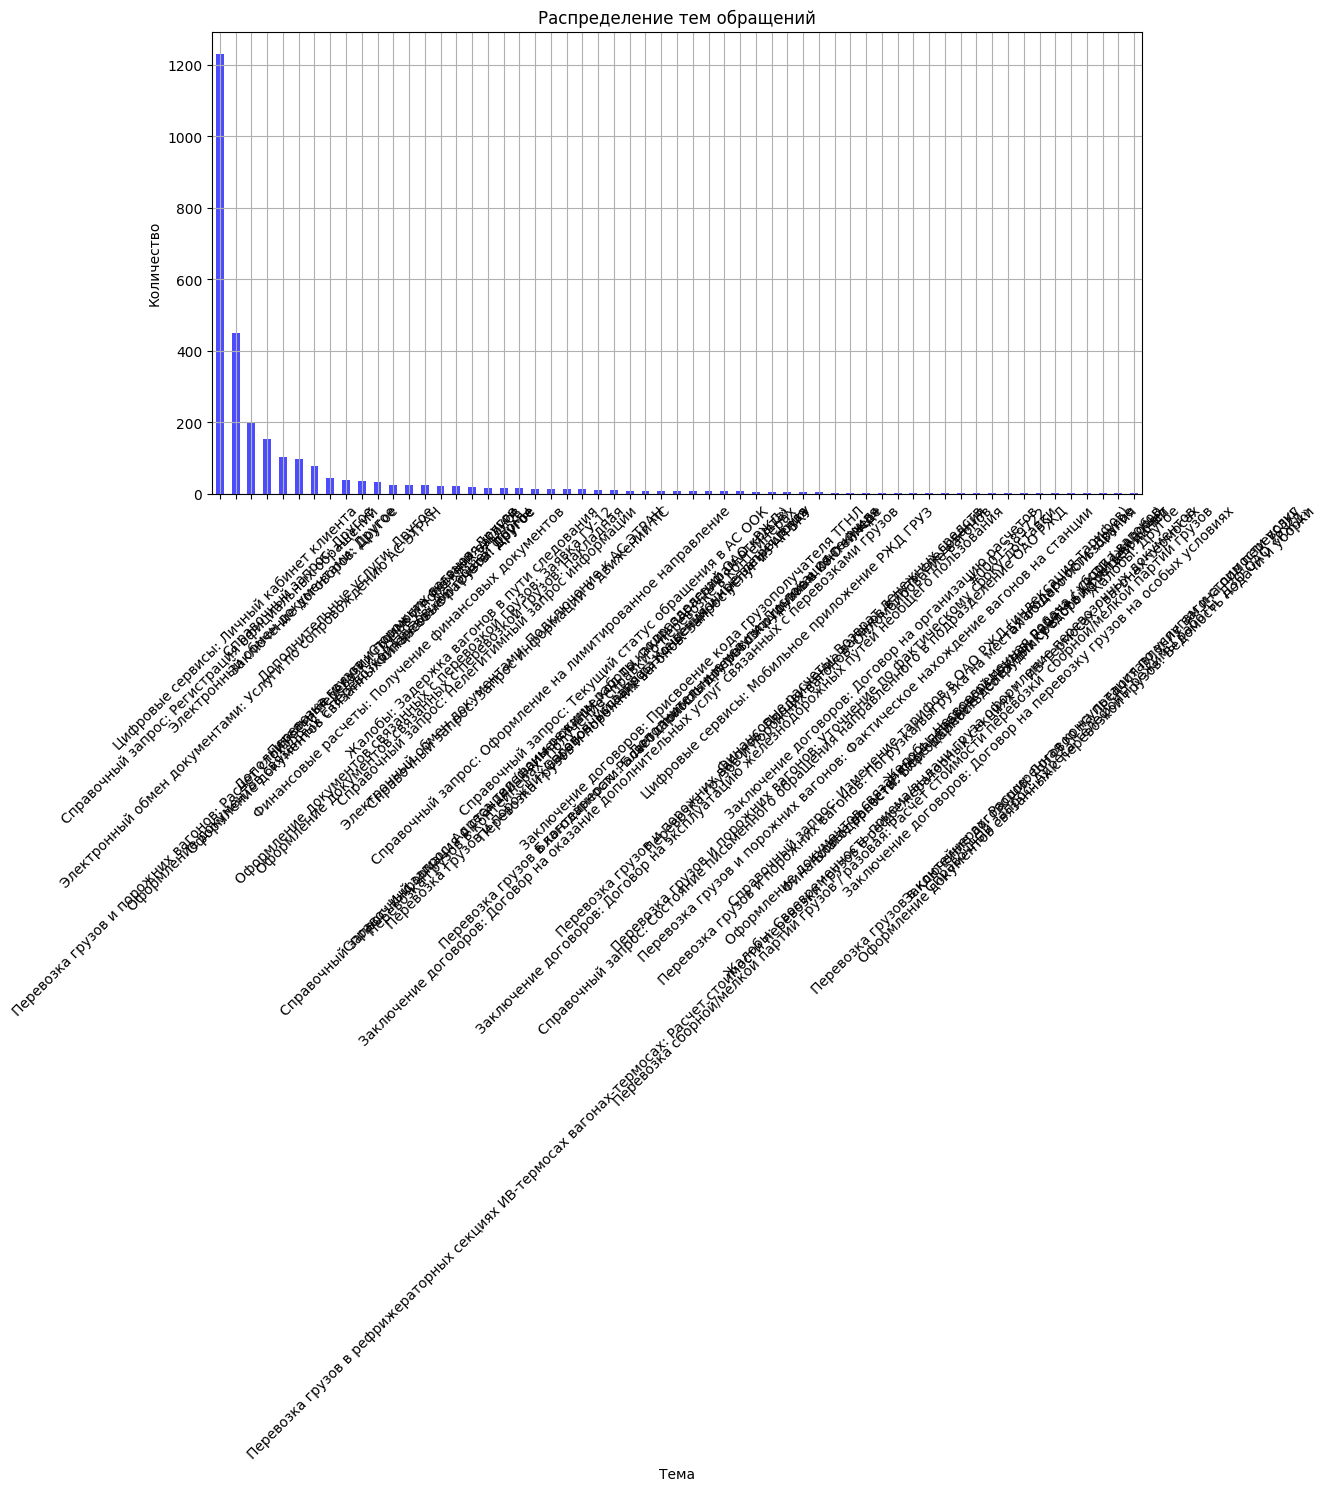

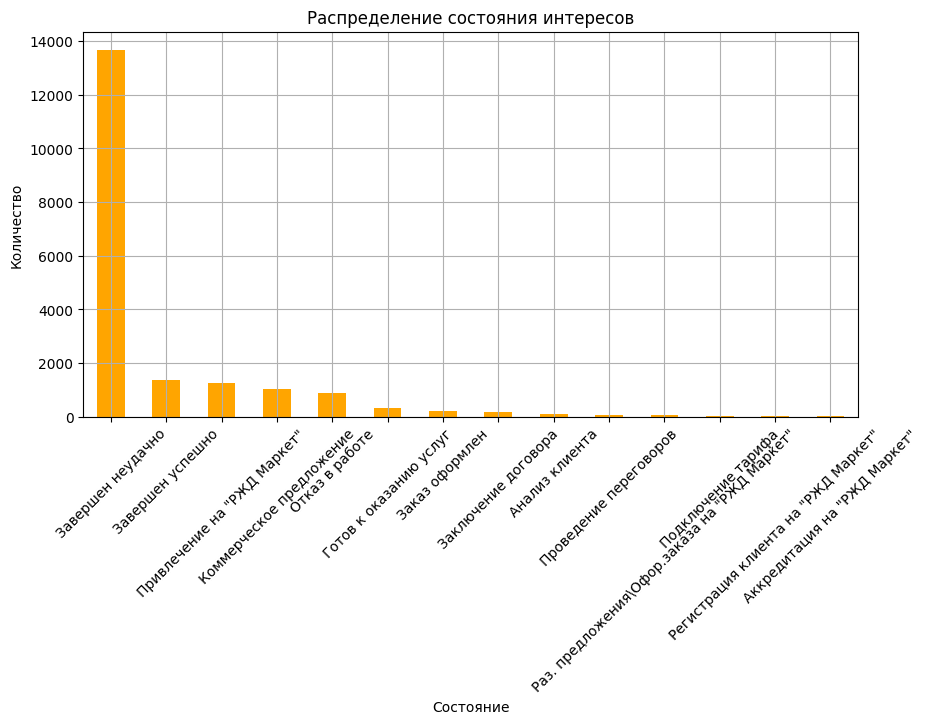

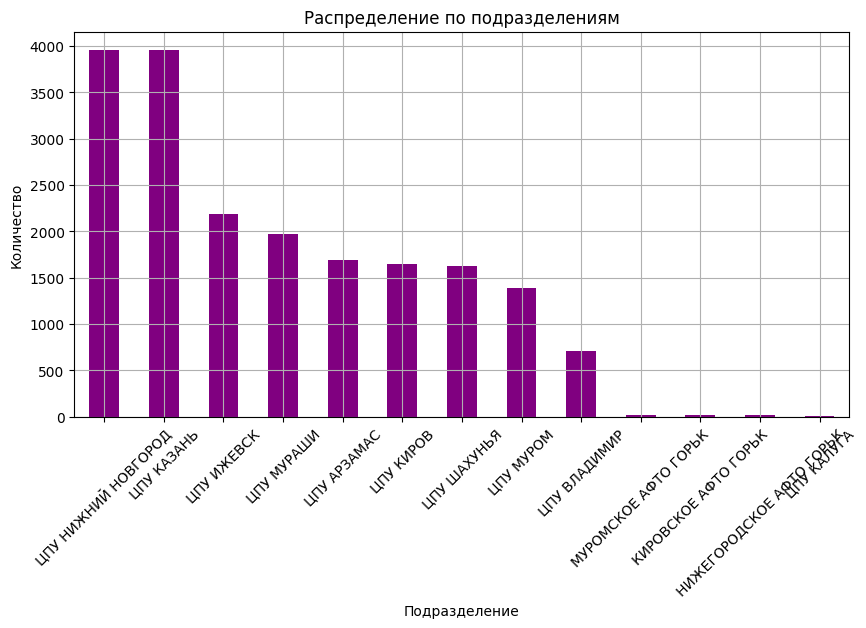

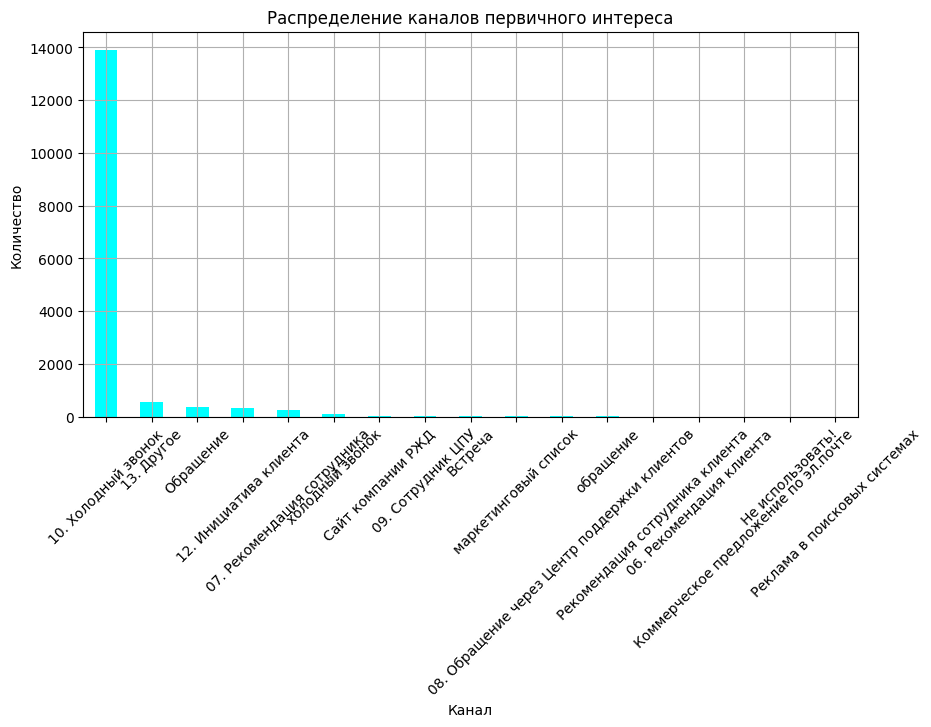

In [32]:
# 1. Количество обращений и интересов по месяцам
df_req['Месяц'] = df_req['Дата'].dt.to_period('M')
df_interest['Месяц'] = df_interest['Дата'].dt.to_period('M')

# 1. Количество обращений и интересов по месяцам
req_monthly_counts = df_req['Месяц'].value_counts().sort_index()
interests_monthly_counts = df_interest['Месяц'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(req_monthly_counts.index.astype(str), req_monthly_counts.values, marker='o', label='Обращения')
plt.plot(interests_monthly_counts.index.astype(str), interests_monthly_counts.values, marker='o', label='Интересы')
plt.xticks(rotation=45)
plt.title('Количество обращений и интересов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

# 2. Распределение тем обращений и интересов
# Извлечение группы из темы
df_req['Группа'] = df_req['Тема'].apply(lambda x: x.split(':')[0])

# Группировка данных по группам тем и подсчет количества записей в каждой группе
grouped_data = df_req['Группа'].value_counts().reset_index()
grouped_data.columns = ['Группа', 'Количество']

# Визуализация
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Группа'], grouped_data['Количество'], color='skyblue')
plt.title('Распределение обращений по группам тем')
plt.xlabel('Группа')
plt.ylabel('Количество обращений')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Анализ состояния интересов
plt.figure(figsize=(10, 5))
df_interest['Состояние'].value_counts().plot(kind='bar', color='orange')
plt.title('Распределение состояния интересов')
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Анализ подразделений
plt.figure(figsize=(10, 5))
df_interest['Подразделение'].value_counts().plot(kind='bar', color='purple')
plt.title('Распределение по подразделениям')
plt.xlabel('Подразделение')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Дополнительный анализ

# 5. Анализ каналов первичного интереса
plt.figure(figsize=(10, 5))
df_interest['Канал первичного интереса'].value_counts().plot(kind='bar', color='cyan')
plt.title('Распределение каналов первичного интереса')
plt.xlabel('Канал')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df = pd.merge(df_req, df_interest, on='ID', how='left')

# Удаление строк с пропусками в 'Ожидаемая выручка' и 'Состояние'
df.dropna(subset=['Ожидаемая выручка', 'Состояние'], inplace=True)


# RFM-анализ
df['Recency'] = (pd.to_datetime('today') - df['Дата_x']).dt.days
df['Frequency'] = df.groupby('Номер_x')['ID'].transform('count')

# 2. Сегментация клиентов (KMeans) - только с заполненными значениями
kmeans = KMeans(n_clusters=3, random_state=42).fit(df[['Recency', 'Frequency', 'Ожидаемая выручка']])
df['Segment'] = kmeans.labels_

# 3. Прогнозирование оттока (RandomForestClassifier)
# Подготовка данных для модели
df['Churn'] = np.where(df['Состояние'] == 'Завершен неудачно', 1, 0)
features = ['Recency', 'Frequency', 'Ожидаемая выручка', 'Segment']
X = df[features]
y = df['Churn']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказание оттока
df['Churn_Probability'] = model.predict_proba(X)[:, 1]

# 4. Ответы на вопросы

# Вопрос 1: Клиенты, требующие внимания
clients_to_work_with = df.sort_values(by=['Churn_Probability', 'Ожидаемая выручка'], ascending=[False, False])
print("Вопрос 1: Клиенты, требующие внимания:")
print(clients_to_work_with[['Номер_x', 'Churn_Probability', 'Ожидаемая выручка']].head())

# Вопрос 2: Клиенты с высокой вероятностью оттока
churn_clients = df[df['Churn_Probability'] > 0.7]
print("\nВопрос 2: Клиенты с высокой вероятностью оттока:")
print(churn_clients[['Номер_x', 'Churn_Probability']].head())

# Вопрос 3: Целевые клиенты с риском оттока
target_churn_clients = df[(df['Ожидаемая выручка'] > df['Ожидаемая выручка'].quantile(0.75)) & (df['Churn_Probability'] > 0.5)]
print("\nВопрос 3: Целевые клиенты с риском оттока:")
print(target_churn_clients[['Номер_x', 'Churn_Probability', 'Ожидаемая выручка']].head())


# Оценка качества модели
y_pred = model.predict(X_test)
print("\nОценка качества модели:")
print(classification_report(y_test, y_pred))

Вопрос 1: Клиенты, требующие внимания:
          Номер_x  Churn_Probability  Ожидаемая выручка
765   0001-089931                1.0          1040797.6
1065  0001-237046                1.0          1000000.0
2950  0001-069300                1.0          1000000.0
3587  0000-027338                1.0           140000.0
4735  0001-223708                1.0           140000.0

Вопрос 2: Клиенты с высокой вероятностью оттока:
         Номер_x  Churn_Probability
54   0001-056868               0.97
56   0001-056868               0.98
74   0001-086013               0.99
77   0001-086083               1.00
117  0001-391422               0.99

Вопрос 3: Целевые клиенты с риском оттока:
         Номер_x  Churn_Probability  Ожидаемая выручка
74   0001-086013               0.99          6148506.0
117  0001-391422               0.99          6148506.0
216  0000-010142               0.93          1000000.0
321  0001-429087               0.77           163046.4
344  0001-263923               0.99     

In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# df_req и df_interest предполагаются уже загруженными

# Работаем только с df_interest, так как в нем есть 'Ожидаемая выручка' и 'Состояние'

# 1. Предобработка данных
df_interest['Дата'] = pd.to_datetime(df_interest['Дата'])

# Удаление строк с пропусками в 'Ожидаемая выручка' и 'Состояние'
df_interest.dropna(subset=['Ожидаемая выручка', 'Состояние'], inplace=True)

# RFM-анализ (адаптированный для df_interest)
df_interest['Recency'] = (pd.to_datetime('today') - df_interest['Дата']).dt.days
df_interest['Frequency'] = df_interest.groupby('ID')['Номер'].transform('count')


# 2. Сегментация клиентов (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_interest[['Recency', 'Frequency', 'Ожидаемая выручка']])
df_interest['Segment'] = kmeans.labels_

# 3. Прогнозирование оттока (RandomForestClassifier)
df_interest['Churn'] = np.where(df_interest['Состояние'] == 'Завершен неудачно', 1, 0)
features = ['Recency', 'Frequency', 'Ожидаемая выручка', 'Segment']
X = df_interest[features]
y = df_interest['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

df_interest['Churn_Probability'] = model.predict_proba(X)[:, 1]

# 4. Ответы на вопросы (адаптированные для df_interest)

# Вопрос 1: Клиенты, требующие внимания
clients_to_work_with = df_interest.sort_values(by=['Churn_Probability', 'Ожидаемая выручка'], ascending=[False, False])
print("Вопрос 1: Клиенты, требующие внимания:")
print(clients_to_work_with[['ID', 'Churn_Probability', 'Ожидаемая выручка']].head())

# Вопрос 2: Клиенты с высокой вероятностью оттока
churn_clients = df_interest[df_interest['Churn_Probability'] > 0.7]
print("\nВопрос 2: Клиенты с высокой вероятностью оттока:")
print(churn_clients[['ID', 'Churn_Probability']].head())

# Вопрос 3: Целевые клиенты с риском оттока
target_churn_clients = df_interest[(df_interest['Ожидаемая выручка'] > df_interest['Ожидаемая выручка'].quantile(0.75)) & (df_interest['Churn_Probability'] > 0.5)]
print("\nВопрос 3: Целевые клиенты с риском оттока:")
print(target_churn_clients[['ID', 'Churn_Probability', 'Ожидаемая выручка']].head())

# Оценка качества модели
y_pred = model.predict(X_test)
print("\nОценка качества модели:")
print(classification_report(y_test, y_pred))

Вопрос 1: Клиенты, требующие внимания:
          ID  Churn_Probability  Ожидаемая выручка
13205  13135                1.0          1000000.0
13207   5211                1.0          1000000.0
13208   7611                1.0          1000000.0
15035  17676                1.0          1000000.0
15038   4982                1.0          1000000.0

Вопрос 2: Клиенты с высокой вероятностью оттока:
       ID  Churn_Probability
33  18418               0.99
58  17714               0.96
59  15774               0.83
61  17528               1.00
63  17529               1.00

Вопрос 3: Целевые клиенты с риском оттока:
        ID  Churn_Probability  Ожидаемая выручка
33   18418               0.99           324013.0
59   15774               0.83          1500000.0
96   14543               0.95           792000.0
103  12222               0.71            50000.0
156    280               0.67            86316.0

Оценка качества модели:
              precision    recall  f1-score   support

           0 

In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Определение оттока (Churn) на основе Recency (6 месяцев = 180 дней + 30 дней)
df_interest['Recency'] = (pd.to_datetime('today') - df_interest['Дата']).dt.days
df_interest['Churn'] = np.where(df_interest['Recency'] > 210, 1, 0)


# Удаление строк с пропусками в 'Ожидаемая выручка' (для KMeans и дальнейшего анализа)
df_interest.dropna(subset=['Ожидаемая выручка'], inplace=True)

# RFM-анализ (Recency уже рассчитан)
df_interest['Frequency'] = df_interest.groupby('ID')['Номер'].transform('count')

# 2. Сегментация клиентов (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_interest[['Recency', 'Frequency', 'Ожидаемая выручка']])
df_interest['Segment'] = kmeans.labels_


# 3. Прогнозирование оттока (RandomForestClassifier - теперь прогнозируем вероятность быть "неактивным" более 6 месяцев)
features = ['Frequency', 'Ожидаемая выручка', 'Segment']
X = df_interest[features]
y = df_interest['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

df_interest['Churn_Probability'] = model.predict_proba(X)[:, 1]


# 4. Ответы на вопросы

# Вопрос 1: Клиенты, требующие внимания (высокая вероятность оттока, высокий потенциал)
clients_to_work_with = df_interest.sort_values(by=['Churn_Probability', 'Ожидаемая выручка'], ascending=[False, False])
print("Вопрос 1: Клиенты, требующие внимания:")
print(clients_to_work_with[['ID', 'Churn_Probability', 'Ожидаемая выручка', 'Recency']].head())

# Вопрос 2: Клиенты с высокой вероятностью оттока (те, кто уже неактивен более 6 месяцев + те, у кого высокая вероятность стать такими)
churn_clients = df_interest[df_interest['Churn_Probability'] > 0.7]
print("\nВопрос 2: Клиенты с высокой вероятностью оттока:")
print(churn_clients[['ID', 'Churn_Probability', 'Recency']].head())

# Вопрос 3: Целевые клиенты с риском оттока
target_churn_clients = df_interest[(df_interest['Ожидаемая выручка'] > df_interest['Ожидаемая выручка'].quantile(0.75)) & (df_interest['Churn_Probability'] > 0.5)]
print("\nВопрос 3: Целевые клиенты с риском оттока:")
print(target_churn_clients[['ID', 'Churn_Probability', 'Ожидаемая выручка', 'Recency']].head())


# Оценка качества модели
y_pred = model.predict(X_test)
print("\nОценка качества модели:")
print(classification_report(y_test, y_pred))

Вопрос 1: Клиенты, требующие внимания:
          ID  Churn_Probability  Ожидаемая выручка  Recency
4016   14237                1.0         24400000.0      413
14301  18252                1.0           801016.0      639
9760   17947                1.0           795500.0      647
12710  16462                1.0           750000.0      492
17531  11660                1.0           728352.0      149

Вопрос 2: Клиенты с высокой вероятностью оттока:
       ID  Churn_Probability  Recency
5   20892           0.729708      633
33  18418           1.000000      632
58  17714           1.000000      267
59  15774           0.925861      267
71  11471           0.974667      605

Вопрос 3: Целевые клиенты с риском оттока:
        ID  Churn_Probability  Ожидаемая выручка  Recency
33   18418           1.000000           324013.0      632
59   15774           0.925861          1500000.0      267
71   11471           0.974667           258540.8      605
96   14543           0.710000           792000.

In [72]:
pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 45.8 MB/s eta 0:00:00
   ━━

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task


# Определение оттока (Churn) - 6 месяцев неактивности
df_interest['Recency'] = (pd.to_datetime('today') - df_interest['Дата']).dt.days
df_interest['Churn'] = np.where(df_interest['Recency'] > 180, 1, 0)

# RFM-анализ (после определения Churn)
df_interest['Frequency'] = df_interest.groupby('ID')['Номер'].transform('count')
df_interest['Monetary'] = df_interest.groupby('ID')['Ожидаемая выручка'].transform('sum')

# 2. Подготовка данных для LightAutoML
features = ['Frequency', 'Monetary', 'Recency']
X = df_interest[features].copy()  # Создаем копию, чтобы избежать предупреждений
y = df_interest['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # стратификация для баланса классов

task = Task('binary')

# 3. Обучение модели с помощью LightAutoML
automl = TabularAutoML(task=task, timeout=60) # timeout - время обучения в секундах
oof_pred = automl.fit_predict(pd.concat([X_train, y_train], axis=1), roles={'target': 'Churn'})

# 4. Предсказание на тестовой выборке
test_pred = automl.predict(X_test)

# 5. Оценка качества модели
print("\nОценка качества модели:")
print(classification_report(y_test, test_pred.data[:, 0]>0.5))

# 6. (Опционально)  Добавление предсказаний в исходный датафрейм
df_interest['Churn_Probability'] = automl.predict(X).data[:, 0]

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 60.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (2243, 4)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 44.31 secs


KeyError: 'index'